<h1>Capstone Project- The Battle of the Neighborhood</h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<a href="#introduction">Introduction</a><br/>
<a href="#data">Download and Explore the Dataset</a><br/>   
<a href="#visualization">Visualize the Data</a><br/>
<a href="#explore">Download and Explore the Dataset for rental accomodation</a><br/>    
<a href="#neighborhood">Explore Neighborhoods in Bangalore and Mumbai</a><br/>
<a href="#discussion">Analyse and Discuss</a><br/>
<a href="#conclusion">Conclusion</a><br/>    
</div>

## Introduction<a id="introduction"></a>

In this project, we will be exploring two cities Mumbai and Bangalore. Both cities are culturally very different. Population density per square km of Bangalore is 11,371 amd Mumbai is 20693. Both cities have their advantages and disadvantage.

We will use our data science powers to compare the two cities based on parameters like Health care, Crime rate, Pollution, cost of living.

In case of relocation we will also explore prominent neighborhood in Bangalore(Electronic city) and Mumbai(BKC) for rental accomodation and venues.

<b>Please Note : All the figures are in INR(Indian Rupees)</b>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

## Download and Explore the Dataset<a id="data"></a>

Mumbai and Bangalore these two cities will be compared based on parameter like Cost of Living, Health care, Pollution, Crime.

Source for this data was<br>
CostOfliving<br>
https://www.numbeo.com/cost-of-living/compare_cities.jsp?country1=India&city1=Mumbai&country2=India&city2=Bangalore<br>
Healthcare<br>
https://www.numbeo.com/health-care/compare_cities.jsp?country1=India&city1=Mumbai&country2=India&city2=Bangalore<br>
Crime<br>
https://www.numbeo.com/crime/compare_cities.jsp?country1=India&city1=Mumbai&country2=India&city2=Bangalore<br>
Bangalore Property price and Rent<br>
https://www.magicbricks.com/Property-Rates-Trends/ALL-RESIDENTIAL-rates-in-Bangalore<br>
<br>

In [148]:
#Cost of living, Health care, Population and Crime data of Mumbai
Mum_data = pd.read_csv("Mumbai_data.csv",delimiter=",")
#Mum_data[0:5]

#Cost of living, Health care, Population and Crime data of Bangalore
Blore_data = pd.read_csv("Blore_data.csv",delimiter=",")
#Blore_data[0:5]

#merge both the datasets into one
Mum_Blore_data_Merger=pd.merge(Mum_data,Blore_data, on='Description')
Mum_Blore_data_Merger.head()

,Description,Cost_x,Category_x,Cost_y,Category_y
0,"Meal, Inexpensive Restaurant",300.0,Restaurants,200.0,Restaurants
1,"Meal for 2 People, Mid-range Restaurant, Three...",1500.0,Restaurants,1000.0,Restaurants
2,McMeal at McDonalds (or Equivalent Combo Meal),300.0,Restaurants,300.0,Restaurants
3,Domestic Beer (0.5 liter draught),180.0,Restaurants,150.0,Restaurants
4,Imported Beer (0.33 liter bottle),300.0,Restaurants,300.0,Restaurants


In [149]:
#Drop Category_x as they are duplicates
#Rename Cost_x as 'Mumbai', Cost_y as 'Bangalore' and Category_y as 'Category'
Mum_Blore_data_Merger=Mum_Blore_data_Merger.drop('Category_x',1)
Mum_Blore_data_Merger=Mum_Blore_data_Merger.rename(columns={"Cost_x":"Mum_Cost","Cost_y":"Blore_Cost","Category_y":"Category"})
Mum_Blore_data_Merger['Category'].value_counts()

Market                       20
Restaurants                   9
Pollution and Cleanliness     7
Transport                     6
Crime                         5
HealthCare                    3
ChildCare                     3
Name: Category, dtype: int64

In [150]:
#Set Description as Index
Mum_Blore_data_Merger.set_index('Description',inplace=True)
Mum_Blore_data_Merger.head()

,Mum_Cost,Blore_Cost,Category
Description,,,
"Meal, Inexpensive Restaurant",300.0,200.0,Restaurants
"Meal for 2 People, Mid-range Restaurant, Three-course",1500.0,1000.0,Restaurants
McMeal at McDonalds (or Equivalent Combo Meal),300.0,300.0,Restaurants
Domestic Beer (0.5 liter draught),180.0,150.0,Restaurants
Imported Beer (0.33 liter bottle),300.0,300.0,Restaurants


In [151]:
Mum_Blore_data_Merger.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Meal, Inexpensive Restaurant to Violent crimes such as assault and armed robbery
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mum_Cost    53 non-null     float64
 1   Blore_Cost  53 non-null     float64
 2   Category    53 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [152]:
#Create dataframe for each of the category for individual visualization. 

#Restaturant
df_Restaurant=Mum_Blore_data_Merger[Mum_Blore_data_Merger['Category']=='Restaurants'].sort_values(by=['Mum_Cost','Blore_Cost'],ascending=True)
df_Restaurant.drop(['Category'], axis=1, inplace=True)
#df_Restaurant.set_index('Description', inplace=True)

#Market
df_Market=Mum_Blore_data_Merger[Mum_Blore_data_Merger['Category']=='Market'].sort_values(by=['Mum_Cost','Blore_Cost'],ascending=True)
df_Market.drop(['Category'], axis=1, inplace=True)
#df_Market.set_index('Description', inplace=True)

#Transport
df_Transport=Mum_Blore_data_Merger[Mum_Blore_data_Merger['Category']=='Transport'].sort_values(by=['Mum_Cost','Blore_Cost'],ascending=True)
df_Transport.drop(['Category'], axis=1, inplace=True)
#df_Transport.set_index('Description', inplace=True)

#ChildCare
df_ChildCare=Mum_Blore_data_Merger[Mum_Blore_data_Merger['Category']=='ChildCare'].sort_values(by=['Mum_Cost','Blore_Cost'],ascending=True)
df_ChildCare.drop(['Category'], axis=1, inplace=True)
#df_ChildCare.set_index('Description', inplace=True)

#Pollution
df_Pollution=Mum_Blore_data_Merger[Mum_Blore_data_Merger['Category']=='Pollution and Cleanliness'].sort_values(by=['Mum_Cost','Blore_Cost'],ascending=True)
df_Pollution.drop(['Category'], axis=1, inplace=True)

#Crime
df_Crime=Mum_Blore_data_Merger[Mum_Blore_data_Merger['Category']=='Crime'].sort_values(by=['Mum_Cost','Blore_Cost'],ascending=True)
df_Crime.drop(['Category'], axis=1, inplace=True)

#HealthCare
df_HealthCare=Mum_Blore_data_Merger[Mum_Blore_data_Merger['Category']=='HealthCare'].sort_values(by=['Mum_Cost','Blore_Cost'],ascending=True)
df_HealthCare.drop(['Category'], axis=1, inplace=True)

print('Shape of Restaturant {}'.format(df_Restaurant.shape))
print('Shape of Market {}'.format(df_Market.shape))
print('Shape of Transport {}'.format(df_Transport.shape))
print('Shape of ChildCare {}'.format(df_ChildCare.shape))
print('Shape of Pollution {}'.format(df_Pollution.shape))
print('Shape of Crime {}'.format(df_Crime.shape))
print('Shape of HealthCare {}'.format(df_HealthCare.shape))

Shape of Restaturant (9, 2)
Shape of Market (20, 2)
Shape of Transport (6, 2)
Shape of ChildCare (3, 2)
Shape of Pollution (7, 2)
Shape of Crime (5, 2)
Shape of HealthCare (3, 2)


## Data Visualization<a id="visualization"></a>

In the following cells we will be viisualizing the data using the horizontal bar plot for the below paramters
1. Market
2. Restaurant
3. HealthCare
4. Transport
5. Pollution
6. Crime
7. ChildCare

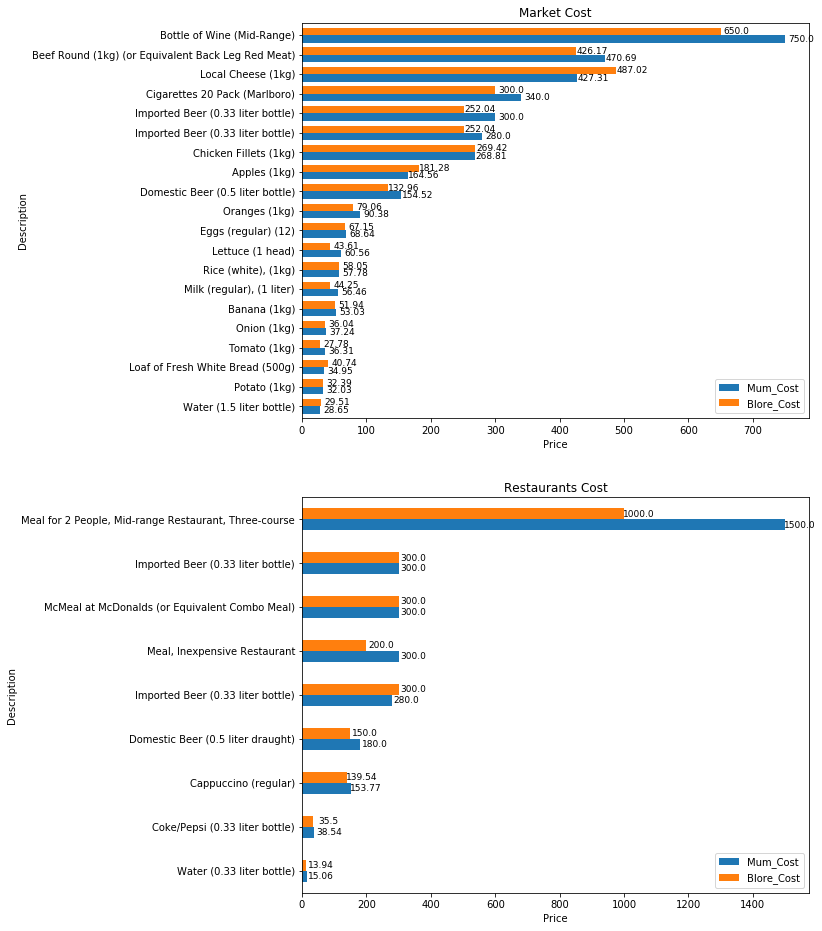

In [13]:
import matplotlib.pyplot as plt

#Generate graphs for Market and Restaurant

fig = plt.figure() 
ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(223) # add subplot 2 (1 row, 2 columns, second plot)

df_Market.plot(kind='barh',figsize=(20, 16), ax=ax0, width = 0.75)  
ax0.set_title('Market Cost')
ax0.set_xlabel('Price')

df_Restaurant.plot(kind='barh', figsize=(20, 16), ax=ax1)   
ax1.set_title('Restaurants Cost')
ax1.set_xlabel('Price')
ax1.legend(loc='lower right')

def autolabel(rects,ax,val):
    for rect in rects:
        width=rect.get_width()
        ax.annotate('{}{}'.format(width,val),xy=(width + 25, rect.get_y() - .1),
                  xytext=(0,1),
                  textcoords="offset points",
                  fontsize=9,                  
                  ha='center',va='bottom')
        
def autolabel1(rects,ax,val):
    for rect in rects:
        width=rect.get_width()
        ax.annotate('{}{}'.format(width,val),xy=(width + 45, rect.get_y()),
                  xytext=(0,1),
                  textcoords="offset points",
                  fontsize=9,                  
                  ha='center',va='bottom')
        
rects0 = ax0.patches
rects1= ax1.patches
autolabel(rects0,ax0,'')
autolabel1(rects1,ax1,'')                    

plt.show()

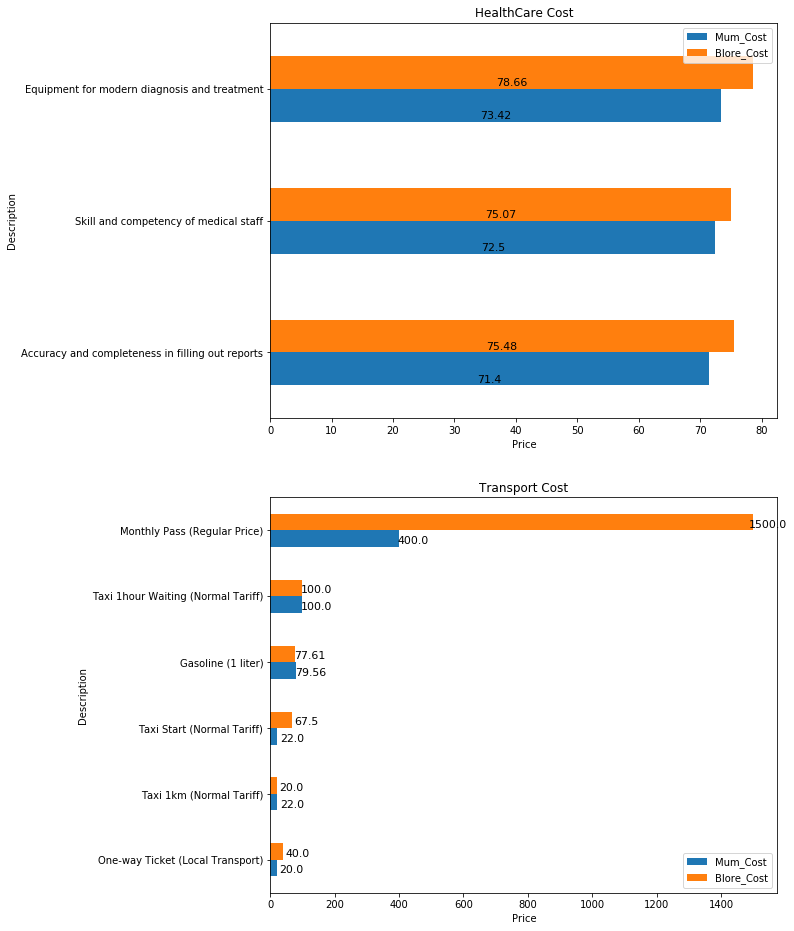

In [61]:
#Generate graphs for Market and Restaurant

fig = plt.figure() 
ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(223) # add subplot 2 (1 row, 2 columns, second plot)

df_HealthCare.plot(kind='barh',figsize=(20, 16), ax=ax0)  
ax0.set_title('HealthCare Cost')
ax0.set_xlabel('Price')

df_Transport.plot(kind='barh', figsize=(20, 16), ax=ax1)   
ax1.set_title('Transport Cost')
ax1.set_xlabel('Price')
ax1.legend(loc='lower right')

def autolabel(rects,ax,val):
    for rect in rects:
        width=rect.get_width()
        ax.annotate('{}{}'.format(width,val),xy=(width/2, rect.get_y()),
                  xytext=(0,1),
                  textcoords="offset points",
                  fontsize=11,                  
                  ha='center',va='bottom')
        
def autolabel1(rects,ax,val):
    for rect in rects:
        width=rect.get_width()
        ax.annotate('{}{}'.format(width,val),xy=(width + 45, rect.get_y()),
                  xytext=(0,1),
                  textcoords="offset points",
                  fontsize=11,                  
                  ha='center',va='bottom')
        
rects0 = ax0.patches
rects1= ax1.patches
autolabel(rects0,ax0,'')
autolabel1(rects1,ax1,'')                    

plt.show()

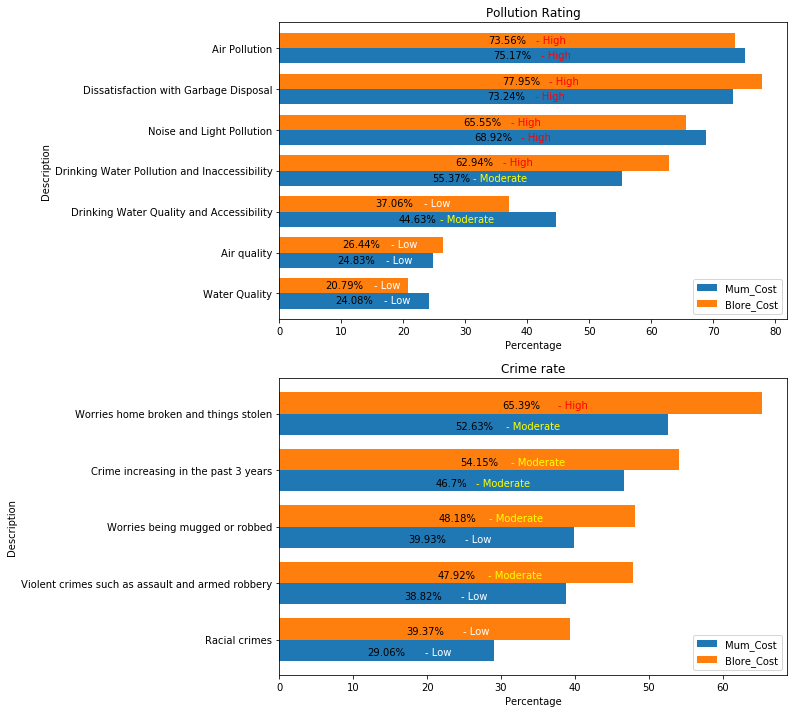

In [19]:
#Generate graphs for Pollution and Crime

fig = plt.figure() 
   
ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(223) # add subplot 2 (1 row, 2 columns, second plot)


df_Pollution.plot(kind='barh',figsize =(20, 12),ax=ax0,width=0.75)  
ax0.set_title('Pollution Rating')
ax0.set_xlabel('Percentage')

df_Crime.plot(kind='barh',figsize=(20, 12), ax=ax1,width=0.75)  
ax1.set_title('Crime rate')
ax1.set_xlabel('Percentage')

#This function is to create data label for the graphs
def autolabel(rects,ax,val):
    for rect in rects:
        width=rect.get_width()
        ax.annotate('{}{}'.format(width,val),xy=(width/2,rect.get_y()),
                  xytext=(0,3),
                  textcoords="offset points",                  
                  ha='center',va='bottom')
        if width > 60:
            ax.annotate('{}'.format('- High'),xy=(width/2+len(str(width))+2,rect.get_y()),
                  xytext=(0,3),
                  textcoords="offset points",  
                  color='red',
                  ha='center',va='bottom')
        elif width < 40:
            ax.annotate('{}'.format('- Low'),xy=(width/2+len(str(width))+2,rect.get_y()),
                  xytext=(0,3),
                  textcoords="offset points",  
                  color='white',
                  ha='center',va='bottom')
        else:
            ax.annotate('{}'.format('- Moderate'),xy=(width/2+len(str(width))+3,rect.get_y()),
                  xytext=(0,3),
                  textcoords="offset points",  
                  color='yellow',
                  ha='center',va='bottom')

#xy=(rect.get_x() + rect.get_width() /2,height)
rects0 = ax0.patches
rects1= ax1.patches
autolabel(rects0,ax0,'%')
autolabel(rects1,ax1,'%')

plt.show()

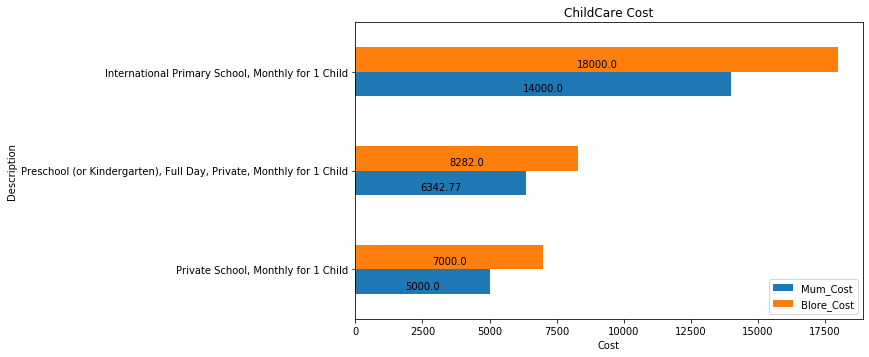

In [62]:
# Generate graphs for ChildCare

fig = plt.figure() 
ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot)

df_ChildCare.plot(kind='barh',figsize=(20, 12), ax=ax0)  
ax0.set_title('ChildCare Cost')
ax0.set_xlabel('Cost')

def autolabel(rects,ax,val):
    for rect in rects:
        width=rect.get_width()        
        ax.annotate('{}{}'.format(width,val),xy=(width/2,rect.get_y()),
                  xytext=(0,3),
                  textcoords="offset points",                  
                  ha='center',va='bottom')        
        

rects0 = ax0.patches
autolabel(rects0,ax0,'')

plt.show()

Calculating the difference in cost between Mumbai and Bangalore for all the items except pollution and Crime to find the cost of living advantage between cities

In [153]:
df_COL=pd.concat([df_HealthCare,df_Transport,df_Market,df_Restaurant,df_ChildCare])
df_COL['Diff'] =  df_COL['Mum_Cost'] - df_COL['Blore_Cost']  
df_COL.head()

,Mum_Cost,Blore_Cost,Diff
Description,,,
Accuracy and completeness in filling out reports,71.40,75.48,-4.08
Skill and competency of medical staff,72.50,75.07,-2.57
Equipment for modern diagnosis and treatment,73.42,78.66,-5.24
One-way Ticket (Local Transport),20.00,40.00,-20.00
Taxi 1km (Normal Tariff),22.00,20.00,2.00


When it comes to Cost of living Bangalore is competivite by 1%
On Crime and Pollution rate both the cities are on similar threshold with crime been comparatively low for Mumbai and pollution high in both the cities

In [22]:
print('Out of total Items {}, Bangalore has the edge over Mumbai in {} Items'.format(df_COL.shape[0],df_COL[df_COL['Diff'] > 0].shape[0]))
print('For {} Items the cost is similar'.format(df_COL[df_COL['Diff'] == 0].shape[0]))

Out of total Items 41, Bangalore has the edge over Mumbai in 21 Items
For 3 Items the cost is similar


## Download and Explore the Dataset for rental accomodation<a id="explore"></a>
We will create two separate dataframe each for Bangalore and Mumbai. In this results the latitude and longitude is missing.
Will populate the latitude and longitude using folium. 

Then based on different accomodations available will average it out for effective clustering.



In [2]:
#Will import a file of list of places along with their rent rates close to Electronic city, the figures are in INR and Monthly.
df_Blore_RentDetails = pd.read_csv("Blore_RentCost.csv",delimiter=",")
#df_Blore_RentDetails.head()

df_Mumbai_RentDetails = pd.read_csv("Mumbai_RentCost.csv",delimiter=",")
#df_Mumbai_RentDetails.head()

In [3]:
#Insert column Logiture and latitude
df_Blore_RentDetails['latitude']=0.00
df_Blore_RentDetails['longitude']=0.00

df_Mumbai_RentDetails['latitude']=0.00
df_Mumbai_RentDetails['longitude']=0.00


In [7]:
df_Blore_RentDetails[:3]

,Place,3BHK,2BHK,1BHK,DistanceFromElectronicCity,TravellingTime,latitude,longitude
0,Begur Road,30000,20000,9000,8.8,17,0.0,0.0
1,Neeladri Nagar,40000,17000,14000,2.3,6,0.0,0.0
2,Doddathoguru,30000,15000,10000,2.4,8,0.0,0.0


In [8]:
df_Mumbai_RentDetails[:3]

,Place,3BHK,2BHK,1BHK,DistanceFromElectronicCity,TravellingTime,latitude,longitude
0,Kalanagar,100000,67000,30000,2.5,7,0.0,0.0
1,Vakola,75000,45000,32000,3.9,9,0.0,0.0
2,King Circle,85000,50000,38000,5.8,14,0.0,0.0


In [4]:
CLIENT_ID = 'GGXMM5B5FN4PAPCRONSWMAXYL1M4DIOHT52FK21FIW2PUXJB' # your Foursquare ID
CLIENT_SECRET = 'ZAAD3IHX2RHBTHBJIOVG5X0TMDREBZS4EDUQGL1OQSFNLPXR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GGXMM5B5FN4PAPCRONSWMAXYL1M4DIOHT52FK21FIW2PUXJB
CLIENT_SECRET:ZAAD3IHX2RHBTHBJIOVG5X0TMDREBZS4EDUQGL1OQSFNLPXR


In [6]:
#Populate the latitude and logitude using folium for Bangalore

geolocator = Nominatim(user_agent="India_explorer")
#if str(row['Place'])!='Doddathoguru':
for i, row in df_Blore_RentDetails.iterrows():    
    address=str(row['Place']) + ', Bangalore'        
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
        df_Blore_RentDetails.at[i,'latitude']=latitude
        df_Blore_RentDetails.at[i,'longitude']=longitude
    except:
        print('For address {} coordinates not found'.format(address))
    
df_Blore_RentDetails

For address Neeladri Nagar, Bangalore coordinates not found
For address Ananth Nagar, Bangalore coordinates not found


,Place,3BHK,2BHK,1BHK,DistanceFromElectronicCity,TravellingTime,latitude,longitude
0,Begur Road,30000,20000,9000,8.8,17,12.906072,77.627779
1,Neeladri Nagar,40000,17000,14000,2.3,6,0.000000,0.000000
2,Doddathoguru,30000,15000,10000,2.4,8,12.852913,77.655615
3,Ananth Nagar,28000,13000,12000,5.2,12,0.000000,0.000000
4,Maragondanahalli,25000,18000,14000,2.8,10,13.203542,77.576072
5,Thirupalya,27000,22000,11000,3.5,10,12.817277,77.669471
6,Hosur road,24000,21000,9000,2.1,4,12.931640,77.613874
7,Vittasandra,25000,19000,8000,5.3,13,12.853390,77.638348


In [7]:
#For 3 cities the Latitude and longitude was not populated so inserting them manualy

#Neeladri Nagar
df_Blore_RentDetails.at[1,'latitude']=12.8391
df_Blore_RentDetails.at[1,'longitude']=77.6472

#Maragondanahalli
df_Blore_RentDetails.at[4,'latitude']=12.8248
df_Blore_RentDetails.at[4,'longitude']=77.6579

#Ananth Nagar
df_Blore_RentDetails.at[3,'latitude']=12.8389
df_Blore_RentDetails.at[3,'longitude']=77.6898

df_Blore_RentDetails

,Place,3BHK,2BHK,1BHK,DistanceFromElectronicCity,TravellingTime,latitude,longitude
0,Begur Road,30000,20000,9000,8.8,17,12.906072,77.627779
1,Neeladri Nagar,40000,17000,14000,2.3,6,12.839100,77.647200
2,Doddathoguru,30000,15000,10000,2.4,8,12.852913,77.655615
3,Ananth Nagar,28000,13000,12000,5.2,12,12.838900,77.689800
4,Maragondanahalli,25000,18000,14000,2.8,10,12.824800,77.657900
5,Thirupalya,27000,22000,11000,3.5,10,12.817277,77.669471
6,Hosur road,24000,21000,9000,2.1,4,12.931640,77.613874
7,Vittasandra,25000,19000,8000,5.3,13,12.853390,77.638348


In [8]:
#Populate the latitude and logitude using folium for Mumbai

for i, row in df_Mumbai_RentDetails.iterrows():    
    address=str(row['Place']) + ', Mumbai' 
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
        df_Mumbai_RentDetails.at[i,'latitude']=latitude
        df_Mumbai_RentDetails.at[i,'longitude']=longitude
    except:
        print('For address {} coordinates not found'.format(address))
    
df_Mumbai_RentDetails

,Place,3BHK,2BHK,1BHK,DistanceFromElectronicCity,TravellingTime,latitude,longitude
0,Kalanagar,100000,67000,30000,2.5,7,19.055422,72.849609
1,Vakola,75000,45000,32000,3.9,9,19.081363,72.853893
2,King Circle,85000,50000,38000,5.8,14,19.075718,72.879286
3,Khar east,70000,60000,36000,5.1,18,19.069658,72.839894
4,Mahim East,55000,40000,10000,6.0,16,19.042314,72.839834
5,Tilak Nagar,47000,35000,15000,5.1,12,19.069238,72.897846
6,Kherwadi,120000,75000,60000,4.3,14,19.061218,72.844873
7,Sakinaka,60000,35000,28000,5.0,18,19.100402,72.881776
8,Vidyavihar,50000,38000,12000,4.1,12,19.079629,72.897491
9,BKC,140000,80000,50000,1.0,2,19.060576,72.865045


Getting the average for 3 type of residential available in India
#3BHK : 3 bedroom, living room and kitchen
#2BHK : 2 bedroom, living room and kitchen
#1BHK : 1 bedroom, living room and kitchen

In [9]:
df_Blore_RentDetails['Average']=df_Blore_RentDetails[['3BHK','2BHK','1BHK']].mean(axis=1).round()
df_Mumbai_RentDetails['Average']=df_Mumbai_RentDetails[['3BHK','2BHK','1BHK']].mean(axis=1).round()


In [10]:
#creating a separate dataframe for clustering for Bangalore
df_Blore_RentDetails_Grouped=df_Blore_RentDetails[['Place','Average']].copy()
df_Blore_RentDetails_Grouped

,Place,Average
0,Begur Road,19667.0
1,Neeladri Nagar,23667.0
2,Doddathoguru,18333.0
3,Ananth Nagar,17667.0
4,Maragondanahalli,19000.0
5,Thirupalya,20000.0
6,Hosur road,18000.0
7,Vittasandra,17333.0


In [11]:
#creating a separate dataframe for clustering for Mumbai
df_Mumbai_RentDetails_Grouped=df_Mumbai_RentDetails[['Place','Average']].copy()
df_Mumbai_RentDetails_Grouped

,Place,Average
0,Kalanagar,65667.0
1,Vakola,50667.0
2,King Circle,57667.0
3,Khar east,55333.0
4,Mahim East,35000.0
5,Tilak Nagar,32333.0
6,Kherwadi,85000.0
7,Sakinaka,41000.0
8,Vidyavihar,33333.0
9,BKC,90000.0


## Explore Neighborhoods in Bangalore and Mumbai<a id="neighborhood"></a>

Cluster the neighborhood based on the accomodation and depict them in the map using folium. 

Will be Clustering using kmeans with 3 cluster

In [12]:
kclusters = 3

df_Blore_RentDetails_Grouped_clustering = df_Blore_RentDetails_Grouped.drop('Place', 1)
df_Mumbai_RentDetails_Grouped_clustering = df_Mumbai_RentDetails_Grouped.drop('Place', 1)

# run k-means clustering for Bangalore data set
kmeans_B = KMeans(n_clusters=kclusters, random_state=0).fit(df_Blore_RentDetails_Grouped_clustering)

# run k-means clustering for Bangalore data set
kmeans_M = KMeans(n_clusters=kclusters, random_state=0).fit(df_Mumbai_RentDetails_Grouped_clustering)

# check cluster labels generated for each row in the dataframe
print('Cluster for Bangalore {}'.format(kmeans_B.labels_[0:3]))
print('Cluster for Mumbai {}'.format(kmeans_M.labels_[0:3] ))

Cluster for Bangalore [0 1 2]
Cluster for Mumbai [0 0 0]


In [13]:
# add clustering labels
df_Blore_RentDetails.insert(0, 'Cluster Labels', kmeans_B.labels_)
df_Mumbai_RentDetails.insert(0, 'Cluster Labels', kmeans_M.labels_)


In [14]:
 # check the First column!
df_Blore_RentDetails

,Cluster Labels,Place,3BHK,2BHK,1BHK,DistanceFromElectronicCity,TravellingTime,latitude,longitude,Average
0,0,Begur Road,30000,20000,9000,8.8,17,12.906072,77.627779,19667.0
1,1,Neeladri Nagar,40000,17000,14000,2.3,6,12.839100,77.647200,23667.0
2,2,Doddathoguru,30000,15000,10000,2.4,8,12.852913,77.655615,18333.0
3,2,Ananth Nagar,28000,13000,12000,5.2,12,12.838900,77.689800,17667.0
4,0,Maragondanahalli,25000,18000,14000,2.8,10,12.824800,77.657900,19000.0
5,0,Thirupalya,27000,22000,11000,3.5,10,12.817277,77.669471,20000.0
6,2,Hosur road,24000,21000,9000,2.1,4,12.931640,77.613874,18000.0
7,2,Vittasandra,25000,19000,8000,5.3,13,12.853390,77.638348,17333.0


In [15]:
# check the First column!
df_Mumbai_RentDetails

,Cluster Labels,Place,3BHK,2BHK,1BHK,DistanceFromElectronicCity,TravellingTime,latitude,longitude,Average
0,0,Kalanagar,100000,67000,30000,2.5,7,19.055422,72.849609,65667.0
1,0,Vakola,75000,45000,32000,3.9,9,19.081363,72.853893,50667.0
2,0,King Circle,85000,50000,38000,5.8,14,19.075718,72.879286,57667.0
3,0,Khar east,70000,60000,36000,5.1,18,19.069658,72.839894,55333.0
4,2,Mahim East,55000,40000,10000,6.0,16,19.042314,72.839834,35000.0
5,2,Tilak Nagar,47000,35000,15000,5.1,12,19.069238,72.897846,32333.0
6,1,Kherwadi,120000,75000,60000,4.3,14,19.061218,72.844873,85000.0
7,2,Sakinaka,60000,35000,28000,5.0,18,19.100402,72.881776,41000.0
8,2,Vidyavihar,50000,38000,12000,4.1,12,19.079629,72.897491,33333.0
9,1,BKC,140000,80000,50000,1.0,2,19.060576,72.865045,90000.0


In [16]:
#Define function to retreive nearby venues, having radius of 500
def getNearbyVenues(names, latitudes, longitudes,cluster, radius=500):
    
    venues_list=[]
    LIMIT=100
    for name, lat, lng,clstr in zip(names, latitudes, longitudes,cluster):
        print('{}-{}'.format(name,clstr))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            clstr,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Cluster Label',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
#Populate nearby venues for Bangalore
ElecCity_venues = getNearbyVenues(names=df_Blore_RentDetails['Place'],
                                   latitudes=df_Blore_RentDetails['latitude'],
                                   longitudes=df_Blore_RentDetails['longitude'],
                                   cluster=df_Blore_RentDetails['Cluster Labels']
                                  )
ElecCity_venues

Begur Road-0
Neeladri Nagar-1
Doddathoguru-2
Ananth Nagar-2
Maragondanahalli-0
Thirupalya-0
Hosur road-2
Vittasandra-2


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Label,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Begur Road,12.906072,77.627779,0,Vodafone Store,12.906673,77.628334,Mobility Store
1,Begur Road,12.906072,77.627779,0,Dande's,12.907754,77.628137,Asian Restaurant
2,Begur Road,12.906072,77.627779,0,Ananda Honda,12.909018,77.627175,Auto Garage
3,Begur Road,12.906072,77.627779,0,Hotel Winelight,12.906592,77.624674,Indian Restaurant
4,Begur Road,12.906072,77.627779,0,Corcus,12.902854,77.627986,Hotel
...,...,...,...,...,...,...,...,...
118,Hosur road,12.931640,77.613874,2,Gourmet West at Westside,12.934645,77.611450,Gourmet Shop
119,Hosur road,12.931640,77.613874,2,Westside,12.934809,77.611594,Clothing Store
120,Hosur road,12.931640,77.613874,2,Firangi Paani,12.935121,77.611890,Pub
121,Hosur road,12.931640,77.613874,2,Bayleaf,12.934695,77.613009,Indian Restaurant


In [17]:
#Populate nearby venues for Mumbai
BKC_venues = getNearbyVenues(names=df_Mumbai_RentDetails['Place'],
                                   latitudes=df_Mumbai_RentDetails['latitude'],
                                   longitudes=df_Mumbai_RentDetails['longitude'],
                                   cluster=df_Mumbai_RentDetails['Cluster Labels']
                                  )
BKC_venues

Kalanagar-0
Vakola-0
King Circle-0
Khar east-0
Mahim East-2
Tilak Nagar-2
Kherwadi-1
Sakinaka-2
Vidyavihar-2
BKC-1


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Label,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kalanagar,19.055422,72.849609,0,MIG Cricket Club,19.057461,72.847706,Sports Club
1,Kalanagar,19.055422,72.849609,0,Boteco,19.055466,72.852208,Brazilian Restaurant
2,Kalanagar,19.055422,72.849609,0,California Pizza Kitchen,19.054952,72.850580,Pizza Place
3,Kalanagar,19.055422,72.849609,0,MIG Club Cloud 9 Bar,19.057417,72.847705,Bar
4,Kalanagar,19.055422,72.849609,0,MIG Club - Belvedere Restaurant,19.056423,72.846612,Restaurant
...,...,...,...,...,...,...,...,...
119,BKC,19.060576,72.865045,1,Taftoon,19.060773,72.863186,Restaurant
120,BKC,19.060576,72.865045,1,Fish-N-Bait,19.059128,72.865524,Seafood Restaurant
121,BKC,19.060576,72.865045,1,China 1,19.062949,72.862135,Chinese Restaurant
122,BKC,19.060576,72.865045,1,Tiffinbox Etc.,19.060673,72.863014,Indian Restaurant


In [77]:
#Function to sort the venue in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Following cells are for displaying top 5 venue details for each neighborhood.

In [132]:
# one hot encoding
ElecCity_onehot = pd.get_dummies(ElecCity_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ElecCity_onehot['Neighborhood'] = ElecCity_venues['Neighborhood'] 
ElecCity_onehot['Cluster'] = ElecCity_venues['Cluster Label'] 
# move neighborhood and Cluster column to the first two column
fixed_columns = list(ElecCity_onehot.columns[-2:]) + list(ElecCity_onehot.columns[:-2])
ElecCity_onehot = ElecCity_onehot[fixed_columns]

ElecCity_onehot.head()

,Neighborhood,Cluster,ATM,Asian Restaurant,Auto Garage,Bakery,Bar,Bookstore,Bowling Alley,Brewery,...,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Sports Bar,Tea Room,Tibetan Restaurant,Women's Store
0,Begur Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Begur Road,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Begur Road,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Begur Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Begur Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
ElecCity_grouped = ElecCity_onehot.groupby('Neighborhood').mean().reset_index()
ElecCity_grouped

,Neighborhood,Cluster,ATM,Asian Restaurant,Auto Garage,Bakery,Bar,Bookstore,Bowling Alley,Brewery,...,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Sports Bar,Tea Room,Tibetan Restaurant,Women's Store
0,Ananth Nagar,2,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
1,Begur Road,0,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
2,Doddathoguru,2,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hosur road,2,0.000000,0.020408,0.000000,0.020408,0.030612,0.020408,0.010204,0.010204,...,0.020408,0.010204,0.010204,0.020408,0.010204,0.020408,0.010204,0.000000,0.010204,0.000000
4,Maragondanahalli,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Neeladri Nagar,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000


Create new dataframe and display the top 5 venues and its clusters for each neighborhood in Bangalore

In [142]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood','Cluster']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ElecCity_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
ElecCity_neighborhoods_venues_sorted['Neighborhood'] = ElecCity_grouped['Neighborhood']
ElecCity_neighborhoods_venues_sorted['Cluster'] = ElecCity_grouped['Cluster']

for ind in np.arange(ElecCity_grouped.shape[0]):
    #print(return_most_common_venues(BKC_grouped.iloc[ind, :],num_top_venues))
    ElecCity_neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(ElecCity_grouped.iloc[ind, :], num_top_venues)

ElecCity_neighborhoods_venues_sorted.sort_values(by=['Cluster'],ascending=True)

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Begur Road,0,Tea Room,Asian Restaurant,Auto Garage,Mobility Store,Hotel
4,Maragondanahalli,0,Fruit & Vegetable Store,Restaurant,Women's Store,Comfort Food Restaurant,Food Court
5,Neeladri Nagar,1,Department Store,Indian Restaurant,Snack Place,Kerala Restaurant,Multicuisine Indian Restaurant
0,Ananth Nagar,2,Women's Store,Department Store,ATM,Sports Bar,Gaming Cafe
2,Doddathoguru,2,Asian Restaurant,Gym,Indian Restaurant,Food,Cosmetics Shop
3,Hosur road,2,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Café,Lounge


Create map for Bangalore as Electronic City as reference, with a popup for each neighborhood showing the name, average rental rates and cluster info

In [38]:

address='Electronic city, Bangalore'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
kclusters=3
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow[1]='#145213' #replce cyan with green
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, avg in zip(df_Blore_RentDetails['latitude'], df_Blore_RentDetails['longitude'], df_Blore_RentDetails['Place'], df_Blore_RentDetails['Cluster Labels'], df_Blore_RentDetails['Average']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' AvgRent ' + str(avg), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [92]:
#Retrieve range based on Cluster for Bangalore
print('Cluster {} color red the range of property is {} - {}'.format(0,df_Blore_RentDetails[df_Blore_RentDetails['Cluster Labels']==0].min()['Average'],df_Blore_RentDetails[df_Blore_RentDetails['Cluster Labels']==0].max()['Average']))
print('Cluster {} color purple the range of property is {} - {}'.format(1,df_Blore_RentDetails[df_Blore_RentDetails['Cluster Labels']==1].min()['Average'],df_Blore_RentDetails[df_Blore_RentDetails['Cluster Labels']==1].max()['Average']))
print('Cluster {} color red the range of property is {} - {}'.format(2,df_Blore_RentDetails[df_Blore_RentDetails['Cluster Labels']==2].min()['Average'],df_Blore_RentDetails[df_Blore_RentDetails['Cluster Labels']==2].max()['Average']))


Cluster 0 color red the range of property is 19000.0 - 20000.0
Cluster 1 color purple the range of property is 23667.0 - 23667.0
Cluster 2 color red the range of property is 17333.0 - 18333.0


Following celss with provide venue details and clustering info for Mumbai

In [137]:
# one hot encoding for BKC - Mumbai
BKC_onehot = pd.get_dummies(BKC_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BKC_onehot['Neighborhood'] = BKC_venues['Neighborhood'] 
BKC_onehot['Cluster'] = BKC_venues['Cluster Label'] 
# move neighborhood column to the first column
fixed_columns = list(BKC_onehot.columns[-2:]) + list(BKC_onehot.columns[:-2])
BKC_onehot = BKC_onehot[fixed_columns]

BKC_onehot.head()

,Neighborhood,Cluster,Amphitheater,Arcade,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Bar,Beer Garden,...,Plaza,Pub,Restaurant,River,Seafood Restaurant,Shopping Mall,South American Restaurant,Sports Club,Tech Startup,Thai Restaurant
0,Kalanagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Kalanagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kalanagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kalanagar,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kalanagar,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [138]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
BKC_grouped = BKC_onehot.groupby('Neighborhood').mean().reset_index()
BKC_grouped

,Neighborhood,Cluster,Amphitheater,Arcade,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Bar,Beer Garden,...,Plaza,Pub,Restaurant,River,Seafood Restaurant,Shopping Mall,South American Restaurant,Sports Club,Tech Startup,Thai Restaurant
0,BKC,1,0.000000,0.000000,0.000000,0.034483,0.034483,0.137931,0.000000,0.000000,...,0.000000,0.000000,0.034483,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.034483
1,Kalanagar,0,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,...,0.000000,0.000000,0.214286,0.000000,0.071429,0.000000,0.071429,0.071429,0.000000,0.000000
2,Khar east,0,0.032258,0.000000,0.000000,0.000000,0.000000,0.096774,0.032258,0.032258,...,0.032258,0.064516,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000
3,Kherwadi,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,King Circle,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Mahim East,2,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Sakinaka,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Tilak Nagar,2,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000
8,Vakola,0,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Vidyavihar,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Create map for Mumbai as BKC City as reference, with a popup for each neighborhood showing the name, average rental rates and cluster info

In [139]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood','Cluster']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
BKC_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
BKC_neighborhoods_venues_sorted['Neighborhood'] = BKC_grouped['Neighborhood']
BKC_neighborhoods_venues_sorted['Cluster'] = BKC_grouped['Cluster']

for ind in np.arange(BKC_grouped.shape[0]):
    #print(return_most_common_venues(BKC_grouped.iloc[ind, :],num_top_venues))
    BKC_neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(BKC_grouped.iloc[ind, :], num_top_venues)

BKC_neighborhoods_venues_sorted.sort_values(by=['Cluster'],ascending=True)

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Kalanagar,0,Restaurant,Indian Restaurant,Brazilian Restaurant,Sports Club,South American Restaurant
2,Khar east,0,Indian Restaurant,Bar,Lounge,Pub,Nightclub
4,King Circle,0,Mughlai Restaurant,Middle Eastern Restaurant,Flea Market,River,Indian Restaurant
8,Vakola,0,Chinese Restaurant,Seafood Restaurant,Bakery,Indian Restaurant,Thai Restaurant
0,BKC,1,Bar,Coffee Shop,Indian Restaurant,Chinese Restaurant,Thai Restaurant
3,Kherwadi,1,Indian Restaurant,Café,Diner,Pizza Place,Thai Restaurant
5,Mahim East,2,Indian Restaurant,Dessert Shop,Arcade,Asian Restaurant,Café
6,Sakinaka,2,Hotel,Hookah Bar,Coffee Shop,Thai Restaurant,Grocery Store
7,Tilak Nagar,2,Indian Restaurant,Fast Food Restaurant,Playground,Italian Restaurant,Chinese Restaurant
9,Vidyavihar,2,Fast Food Restaurant,Indian Restaurant,Bar,Cricket Ground,Juice Bar


In [25]:
## create map for Mumbai 
address='Bandra Kurla Complex, Mumbai'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)
kclusters=3
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow[1]='#145213' #replce cyan with green
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, avg in zip(df_Mumbai_RentDetails['latitude'], df_Mumbai_RentDetails['longitude'], df_Mumbai_RentDetails['Place'], df_Mumbai_RentDetails['Cluster Labels'], df_Mumbai_RentDetails['Average']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' AvgRent ' + str(avg), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [140]:
#Retrieve range based on Cluster for mumbai
print('Cluster {} color red the range of property is {} - {}'.format(0,df_Mumbai_RentDetails[df_Mumbai_RentDetails['Cluster Labels']==0].min()['Average'],df_Mumbai_RentDetails[df_Mumbai_RentDetails['Cluster Labels']==0].max()['Average']))
print('Cluster {} color purple the range of property is {} - {}'.format(1,df_Mumbai_RentDetails[df_Mumbai_RentDetails['Cluster Labels']==1].min()['Average'],df_Mumbai_RentDetails[df_Mumbai_RentDetails['Cluster Labels']==1].max()['Average']))
print('Cluster {} color green the range of property is {} - {}'.format(2,df_Mumbai_RentDetails[df_Mumbai_RentDetails['Cluster Labels']==2].min()['Average'],df_Mumbai_RentDetails[df_Mumbai_RentDetails['Cluster Labels']==2].max()['Average']))


Cluster 0 color red the range of property is 50667.0 - 65667.0
Cluster 1 color purple the range of property is 85000.0 - 90000.0
Cluster 2 color green the range of property is 32333.0 - 41000.0


## Analyse and Discussion<a id="discussion"></a>

HealtCare, Crime, Pollution and CostOfLiving(Market, Restaurants, Transport) are some of the key parameter that a user considers during relocation. These parameter play a critical role in having a safe health lifestyle.

Horizontal Bar visualization is carried out to compare each parameter Bangalore and Mumbai, if you have noticed for Market, Transport, HealthCare, Restaurant and ChildCare Bangalore has an edge over Mumbai by a 1% based on cost differentiation for each items i.e items having lesser value / total items = 21/41. in short on cast both cities are almost similar.

On Crime and Pollution control too both the cities are on similar threshold with crime been comparitively low for Mumbai and  pollution high in both the cities.

Once we have considered which city is apt for relocation depending on users priority we can explore some of the key area
within those cities for job opportunities and rental accomodation.

From rental accomodation we will consider places surrounding the job market area eg; Electronic city in Bangalore and BKC in Mumbai. 



## Conclusion<a id="conclusion"></a>

Purpose of this project was to identify which city would be good for relocation based on parameters like Cost of living(Market, Restaurants, ChildCare, Transport. Healthcare), Pollution and Crime.

This will also consider rental accomodation and venue details within those neighbourhoods close to Job cities. The rental rates are clustered based on average rental cost. These clusters will act as a guide for the stakeholders to decide on rental accomodation based on their budget.

There is room for improvement for instance parameter like accessibility to education institution, nearest transport systems, open parks can be considered when selecting the neighborhoods.The items to compare can be more refined.   